# News Article Classification

In [1]:
## -- Importing Necessary Libraries --##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re ## Pattern matching
import nltk
from nltk.corpus import stopwords  ## removing stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer  ## for stemming and lemmatization

In [11]:
df = pd.read_csv('data_news - data_news.csv')
df.head()

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   

                                               links  \
0  https://www.huffingtonpost.com/entry/running-l...   
1  https://www.huffingtonpost.com/entry/talking-t...   
2  https://www.huffingtonpost.com/entry/crenezuma...   
3  https://www.huffingtonpost.com/entry/meaningfu...   
4  https://www.huffingtonpost.com/entry/green-sup...   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   

                             keywords  
0                     running-lessons  
1           talking-to-yourself-crazy  
2  crenezumab-alzheimers-disease-drug  
3                     meaningful-life  
4                    green-superfoods

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [13]:
df.isnull().sum()  ## Checks for null values

category                0
headline                0
links                   0
short_description       0
keywords             2668
dtype: int64

**We can see null values in Keywords column**

In [55]:
df_filled = df.copy()  ## Creates a duplicate copy of original dataset

In [16]:
df_filled['keywords'] = df_filled['keywords'].fillna(' ')  ## Replaces null values with blank space
df_filled['keywords'].isnull().sum()

np.int64(0)

In [19]:
df_filled = df_filled.drop(columns =['links'])  ## Links column is not required in analysis

In [21]:
df_filled.head(10)

category                                           headline  \
0  WELLNESS              143 Miles in 35 Days: Lessons Learned   
1  WELLNESS       Talking to Yourself: Crazy or Crazy Helpful?   
2  WELLNESS  Crenezumab: Trial Will Gauge Whether Alzheimer...   
3  WELLNESS                     Oh, What a Difference She Made   
4  WELLNESS                                   Green Superfoods   
5  WELLNESS              Bad Love Advice: 9 Lessons To Unlearn   
6  WELLNESS   The Happiest (And Unhappiest) States In The U.S.   
7  WELLNESS  Seaweed: The Green Superfood You're Not Eating...   
8  WELLNESS                                  Addicted to Food?   
9  WELLNESS         High Tech Works When It Enables High Touch   

                                   short_description  \
0  Resting is part of training. I've confirmed wh...   
1  Think of talking to yourself as a tool to coac...   
2  The clock is ticking for the United States to ...   
3  If you want to be busy, keep trying to be perf...   
4  First, the bad news: Soda bread, corned beef a...   
5  By Carey Moss for YouBeauty.com Love rom-coms,...   
6  The nation in general scored a 66.2 in 2011 on...   
7  It's also worth remembering that if the water ...   
8  If you look at our culture's eating behavior, ...   
9  François-Marie Arouet, 18th century French aut...   

                                         keywords  
0                                 running-lessons  
1                       talking-to-yourself-crazy  
2              crenezumab-alzheimers-disease-drug  
3                                 meaningful-life  
4                                green-superfoods  
5                     bad-love-advice-from-movies  
6  happiest-state-well-being-united-states-gallup  
7               superfood-seaweed-health-benefits  
8                                  food-addiction  
9                       high-tech-works-when-it-e

In [28]:
df_filled['category'].value_counts() ## Count of all the unique categories

category
WELLNESS          5000
POLITICS          5000
ENTERTAINMENT     5000
TRAVEL            5000
STYLE & BEAUTY    5000
PARENTING         5000
FOOD & DRINK      5000
WORLD NEWS        5000
BUSINESS          5000
SPORTS            5000
Name: count, dtype: int64

**All the categories have same entries i.e. 5000**

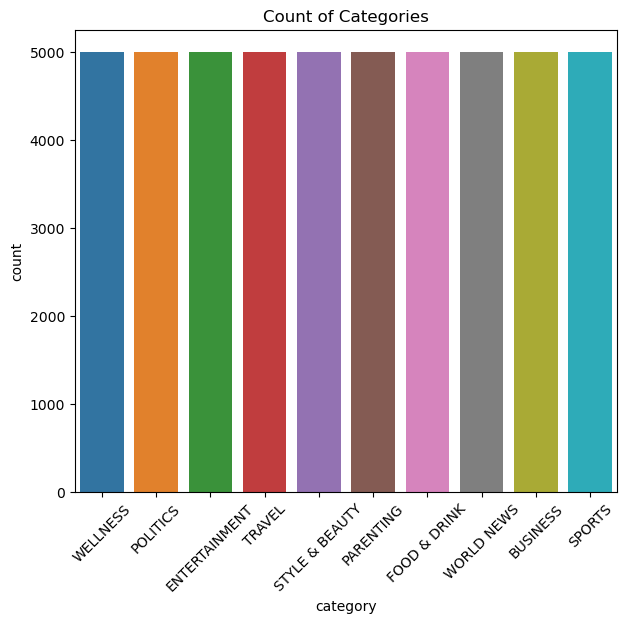

In [27]:
##-- Plots the count of each category --##
plt.figure(figsize=(7,6))
sns.countplot(x='category',hue='category',data=df_filled)
plt.xticks(rotation=45)
plt.title("Count of Categories")
plt.show()

In [34]:
stop_words = set(stopwords.words('english'))  ## set of all english stopwords

In [40]:
##-- Function to clean texts --##
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z0-9\-']"," ", text) ## Pattern(A-Z and numbers also)
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = word_tokenize(text)
    filtered_tokens = ' '.join(
    [word for word in tokens if word not in stop_words]) ## List to join after preprocessing
    return filtered_tokens

In [56]:
##-- Applying function to all features columns --##
df_filled['headline'] = df_filled['headline'].apply(clean_text)
df_filled['short_description'] = df_filled['short_description'].apply(clean_text)
df_filled['keywords'] = df_filled['keywords'].apply(clean_text)

In [59]:
## Stemming preprocessed columns --##
stemmer = PorterStemmer()
def stem_text(text):
    text = str(text)
    tokens = word_tokenize(text)
    stemmed_tokens =' '.join([stemmer.stem(token) for token in tokens ])
    return stemmed_tokens

In [64]:
##-- Lemmatizing preprocessed columns --##
lemmatized = WordNetLemmatizer()
def lemmatized_text(text):
    text = str(text)
    tokens = word_tokenize(text)
    lemmatized_tokens = ' '.join([lemmatized.lemmatize(token) for token in tokens])
    return lemmatized_tokens

In [61]:
cols = ['headline','short_description','keywords']  ## List of all feature columns
for col in cols:
    df_filled[col + '_stemmed'] = df_filled[col].map(stem_text) ## maps function to each feature column

In [227]:
for col in cols:
    df_filled[col + '_lemmatized'] = df_filled[col].map(lemmatized_text) ## maps function to each feature column

## Model Training and Vectorization

In [93]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### BOW

In [241]:
df_filled['features_combined'] = (df_filled['headline_lemmatized'] + ' ' +
                     df_filled['short_description_lemmatized'] + 
                                  ' ' + df_filled['keywords_lemmatized']) ## Combining all featured column
bow_vectorize = CountVectorizer(
    token_pattern=r'\b[a-zA-Z]{2,}\b',
    max_features=5000,
    stop_words='english') ## BOW for lemmatized columns

X_bow = bow_vectorize.fit_transform(df_filled['features_combined'])

In [242]:
##-- Features according to BOW --##
print(X_bow[5].toarray())
print(f"The list of features of bow matrix are \n{bow_vectorize.get_feature_names_out().tolist()[:20]}")

[[0 0 0 ... 0 0 0]]
The list of features of bow matrix are 
['aaron', 'ab', 'abandoned', 'abc', 'ability', 'able', 'aboard', 'abortion', 'abroad', 'absence', 'absolutely', 'abuse', 'academic', 'academy', 'accept', 'acceptance', 'access', 'accessory', 'accident', 'accidental']


In [236]:
from sklearn.model_selection import train_test_split
X = df_filled['features_combined'] ## Feature column as input
y = df_filled['category'] ## Target or Output Column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### TF-IDF

In [237]:
tfidf_vectorize = TfidfVectorizer(token_pattern=r'\b[a-zA-Z]{2,}\b'
                                  ,max_features=5000,stop_words='english') ## Maximum features limited to 5000
X_train_tfidf = tfidf_vectorize.fit_transform(X_train)
X_test_tfidf = tfidf_vectorize.transform(X_test)

In [238]:
##-- Features according to TF-IDF --##
print(X_train_tfidf[5].toarray())
print(f"The list of features of TF-IDF are \n{tfidf_vectorize.get_feature_names_out().tolist()[:20]}")

[[0. 0. 0. ... 0. 0. 0.]]
The list of features of TF-IDF are 
['aaron', 'ab', 'abandoned', 'abc', 'ability', 'able', 'aboard', 'abortion', 'abroad', 'absence', 'absolute', 'absolutely', 'abundance', 'abuse', 'academy', 'accept', 'acceptable', 'acceptance', 'access', 'accessory']


**Lemmatization is used instead of Stemming, in News classification base form is more important**

## Logistic Regression Model

In [239]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tfidf,y_train) 

LogisticRegression()

### Model Prediction and Evaluation

In [240]:
y_pred_lr = lr.predict(X_test_tfidf) 

lr_accuracy = accuracy_score(y_test,y_pred_lr)
lr_classification = classification_report(y_test,y_pred_lr)
lr_confusion_matrix = confusion_matrix(y_test,y_pred_lr)

##-- Evaluating model performance --##
print(f"The Accuracy of model : {round(lr_accuracy*100,2)}%")
print("\n The Classification Report :")
print(lr_classification)

The Accuracy of model : 81.45%

 The Classification Report :
                precision    recall  f1-score   support

      BUSINESS       0.74      0.80      0.77       955
 ENTERTAINMENT       0.79      0.80      0.79       985
  FOOD & DRINK       0.87      0.85      0.86      1021
     PARENTING       0.80      0.78      0.79      1030
      POLITICS       0.80      0.76      0.78      1034
        SPORTS       0.88      0.89      0.89       995
STYLE & BEAUTY       0.88      0.86      0.87       986
        TRAVEL       0.83      0.81      0.82      1008
      WELLNESS       0.76      0.77      0.76      1009
    WORLD NEWS       0.80      0.82      0.81       977

      accuracy                           0.81     10000
     macro avg       0.82      0.81      0.81     10000
  weighted avg       0.82      0.81      0.81     10000



**The LR model was able to predict 81% correct classifications**

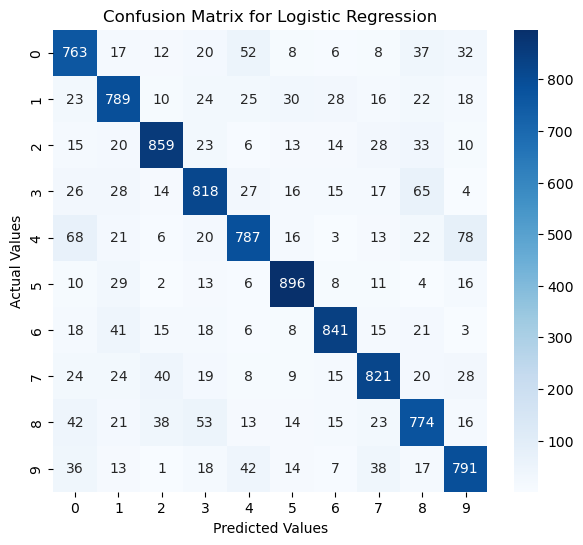

In [96]:
##-- Confusion Matrix for LR model --##
plt.figure(figsize=(7,6))
sns.heatmap(lr_confusion_matrix,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## Support Vector Machine

In [98]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=42) ## Linear kernel for linearly seperable data
svc.fit(X_train_tfidf,y_train)

SVC(kernel='linear', random_state=42)

### Model Prediction and Evaluation

In [99]:
y_pred_svc = svc.predict(X_test_tfidf)

svc_accuracy = accuracy_score(y_test,y_pred_svc)
svc_classification = classification_report(y_test,y_pred_svc)
svc_confusion_matrix = confusion_matrix(y_test,y_pred_svc)

print(f"The Accuracy of model : {round(svc_accuracy*100,2)}%")
print("\n The Classification Report :")
print(svc_classification)

The Accuracy of model : 81.09%

 The Classification Report :
                precision    recall  f1-score   support

      BUSINESS       0.73      0.82      0.77       955
 ENTERTAINMENT       0.77      0.80      0.79       985
  FOOD & DRINK       0.85      0.85      0.85      1021
     PARENTING       0.79      0.79      0.79      1030
      POLITICS       0.80      0.75      0.77      1034
        SPORTS       0.89      0.89      0.89       995
STYLE & BEAUTY       0.89      0.85      0.87       986
        TRAVEL       0.83      0.81      0.82      1008
      WELLNESS       0.76      0.76      0.76      1009
    WORLD NEWS       0.81      0.79      0.80       977

      accuracy                           0.81     10000
     macro avg       0.81      0.81      0.81     10000
  weighted avg       0.81      0.81      0.81     10000



**The model was able to predict 81% correct classifications**

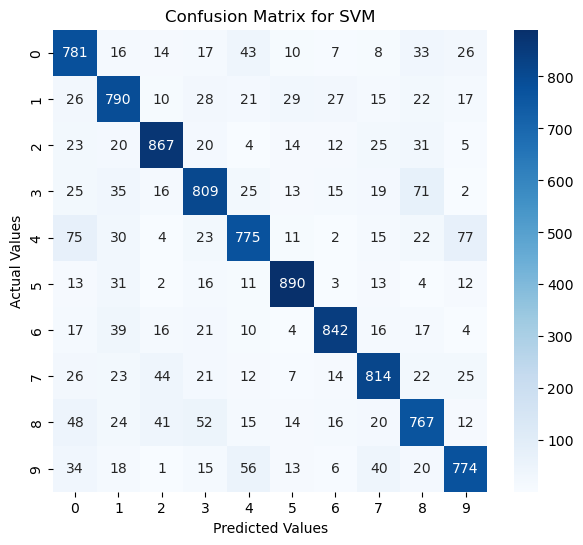

In [100]:
##-- Confusion Matrix for SVM model --##
plt.figure(figsize=(7,6))
sns.heatmap(svc_confusion_matrix,annot=True,fmt='g',cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

## LSTM | Deep Learning

In [161]:
from sklearn.preprocessing import LabelEncoder ## Converting into numerical values to each category
from gensim.models import Word2Vec ## Word Embeddings
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical ## Interger labels to one-hot encoded vectors
from tensorflow.keras.models import Sequential  ## Layering of deep learning models
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional ## Used for both forward and backward integration

In [146]:
##-- Features and Labels converted to arrays --##
features = df_filled['features_combined'].astype(str).values
labels = df_filled['category'].values

In [162]:
tokened_sentence = [word_tokenize(text) for text in features] ## Tokenized list

In [164]:
embedding_dim = 150
w2v_model = Word2Vec(
    sentences=tokened_sentence,
    vector_size=embedding_dim,
    window=5,
    min_count=2,
    workers=4,
    sg=1,   
    epochs=10) ## Fitting the Word embedding model to convert tokens into vectors

Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'
Exception ignored in: 'gensim.models.word2vec_inner.our_dot_float'


In [165]:
##-- Converting categorical values to numerical values --##
le = LabelEncoder()
labels = le.fit_transform(df_filled['category'])
labels_encoded = to_categorical(labels)

In [245]:
max_length = 200 ## Maximum number of tokens per sentence 

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(features)
sequences = tokenizer.texts_to_sequences(features) ## Converts texts into list of integers
vocab_size = len(tokenizer.word_index)+ 1  ## Total Number of Unique values
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

### Model Training

In [246]:
X_train,X_test,y_train,y_test = train_test_split(padded_sequences,labels_encoded,test_size=0.2,random_state=42)

In [247]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        if word in w2v_model.wv:
            embedding_matrix[i] = w2v_model.wv[word]

In [248]:
model = Sequential([Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix], ## Explicit word embedded matrix
              input_length=max_length,
              trainable=False),
    Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)), ## Bidirectional to allow model by both forward and backward propagation
    Dense(128, activation='relu'), ## Relu to keep value between -1 to +1
    Dropout(0.3),
    Dense(labels_encoded.shape[1], activation='softmax')    ## Converts output in probabilty form 
])

model.compile(loss='categorical_crossentropy',  ## For multi-class Classification
              optimizer='adam',
              metrics=['accuracy'])
model.summary() 

C:\Users\rajay\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │       8,185,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,185,800 (31.23 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,185,800 (31.23 MB)

In [249]:
history = model.fit(
    X_train, y_train,
    epochs=10, ## Number of times model will encounter data while training                
    batch_size=64,
    validation_split=0.2, ## 20% data for validation
    verbose=1)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 664s 1s/step - accuracy: 0.4468 - loss: 1.5618 - val_accuracy: 0.5872 - val_loss: 1.2122
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 642s 1s/step - accuracy: 0.5829 - loss: 1.2348 - val_accuracy: 0.6236 - val_loss: 1.0973
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 673s 1s/step - accuracy: 0.6325 - loss: 1.0991 - val_accuracy: 0.6650 - val_loss: 1.0029
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 695s 1s/step - accuracy: 0.6647 - loss: 1.0195 - val_accuracy: 0.6800 - val_loss: 0.9626
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 882s 2s/step - accuracy: 0.6778 - loss: 0.9711 - val_accuracy: 0.6875 - val_loss: 0.9385
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 773s 2s/step - accuracy: 0.6932 - loss: 0.9284 - val_accuracy: 0.6961 - val_loss: 0.9130
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 758s 2s/step - accuracy: 0.7044 - loss: 0.8937 - val_accuracy: 0.7096 - val_loss: 0.8819
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 712s 1s/step - accuracy: 0.7121 - loss: 0.8694 - val_accu

### Model Prediction and Evaluation

In [250]:
lstm_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 140ms/step


In [251]:
y_true = np.argmax(y_test, axis=1) ## Converts back to integer class
y_pred = np.argmax(lstm_pred, axis=1) ## Convertes probabilities into predicted class

In [252]:
lstm_accuracy = accuracy_score(y_true,y_pred)
lstm_classification = classification_report(y_true,y_pred)
print(f"The Accuracy of LSTM model is {lstm_accuracy*100:.2f}%")
print("\nThe Classification Report of LSTM model")
print(lstm_classification)

The Accuracy of LSTM model is 73.36%

The Classification Report of LSTM model
              precision    recall  f1-score   support

           0       0.65      0.69      0.67       955
           1       0.61      0.75      0.68       985
           2       0.85      0.83      0.84      1021
           3       0.76      0.74      0.75      1030
           4       0.69      0.56      0.62      1034
           5       0.76      0.74      0.75       995
           6       0.83      0.83      0.83       986
           7       0.76      0.75      0.76      1008
           8       0.73      0.76      0.75      1009
           9       0.72      0.69      0.70       977

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000



**The Model was able to give 73% accuracy**

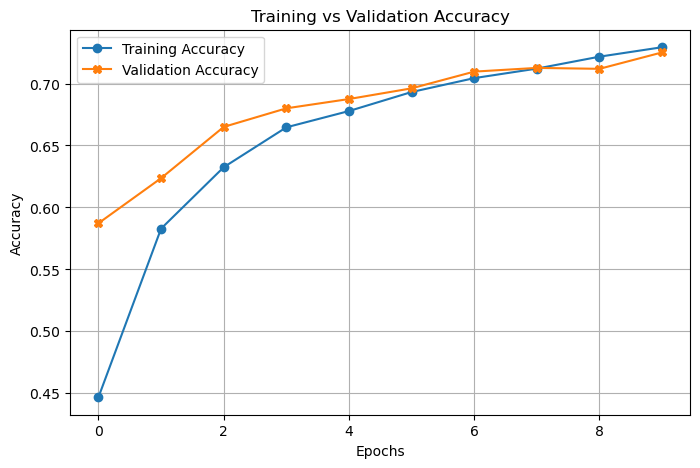

In [253]:
##-- Plotting training accuracy vs validation accuracy --##
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Training Accuracy',marker="o")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy',marker="X")
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

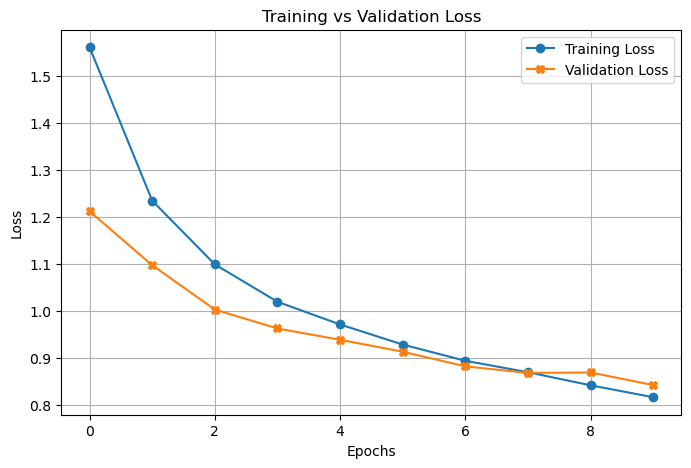

In [254]:
##-- Plotting training loss vs validation loss --##
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss',marker = "o")
plt.plot(history.history['val_loss'], label='Validation Loss',marker = "X")
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

### SVC Model Tuning

In [212]:
from sklearn.model_selection import RandomizedSearchCV  ## Random hyper-parameter tuning

In [223]:
svc_grid = {'C':[1,1.2,2],
            'kernel':['rbf','linear','poly']} ## Grid for model tuning
svc_randomized = RandomizedSearchCV(SVC(),svc_grid,cv=5,scoring='accuracy',n_jobs=1,n_iter=1)
svc_randomized.fit(X_train_tfidf,y_train)
svc_pred_randomized = svc_randomized.predict(X_test_tfidf)

In [224]:
svc_randomized_best_score = svc_randomized.best_score_  ## Best score according to the RandomizedSearchCV
svc_randomized_best_params = svc_randomized.best_params_ ## Best parameter according to the RandomizedSearchCV

In [226]:
print(f"The best score of model is {round(svc_randomized_best_score*100,2)}%")
print(f"The best parameters of model is {svc_randomized_best_params}")

The best score od model is 82.03%
The best parameters of model is {'kernel': 'rbf', 'C': 1}


**After tuning, SVM model gives a minor jump to 82% accuracy**

## Model Consumption

In [201]:
##-- Function to preprocess and predict new/unseen features --##
def predict_category(features):
    features = str(features).lower()
    features = re.sub(r"[^a-z0-9\-']"," ", features)
    features = re.sub(r'\s+', ' ', features).strip() ## Remove white spaces (if any)
    preprocessed_features = ' '.join([
    word for word in word_tokenize(features) if word not in stop_words])
    features_tfidf = tfidf_vectorize.transform([preprocessed_features])
    predictions = lr.predict(features_tfidf)
    return predictions[0]

In [205]:
print("Please enter the Headline, short_description, keywords to classify news")
print('Enter continue to start or exit to stop')

user_input = input('Enter continue or exit') ## Takes User input

if user_input.lower()=='continue':
    headline = input('Enter the Headline:')  ## Headline of News
    short_description = input('Enter the Description:') ## Brief about the news
    keywords = input('Enter the Keywords:')  ## Important keywords
    combined_features = headline + " " + short_description + " " + keywords ## Combines all user inputs
    predicted_news = predict_category(combined_features) ## Applies the preprocessing function
    
    print(f"\nPredicted News Category : {predicted_news}") ## Prints predicted output 

else:
    print('Exiting...')


Please enter the Headline, short_description, keywords to classify news
Enter continue to start or exit to stop


Enter continue or exit continue
Enter the Headline: Istanbul Police Violently Disperse Banned LGBT Rally
Enter the Description: Police fired tear gas and rubber pellets on a march for transgender people.
Enter the Keywords: norway-helicopter-crash



Predicted News Category : WORLD NEWS


##  **Final Report and Conclusion**

### **1. Dataset Overview**
- The dataset used for this project is **balanced**, containing **5,000 records per category**, ensuring unbiased model training and evaluation.  

---

### **2. Text Preprocessing**
A comprehensive text preprocessing pipeline was implemented to clean and standardize the data. The key steps included:  
- **Regular expression–based text cleaning** to remove unwanted symbols and patterns.  
- **Stopword removal** to eliminate non-informative words.  
- **Stemming** and **Lemmatization** to reduce words to their meaningful forms.  

> **Note:** Lemmatization was preferred over stemming, as retaining the **base form of words** improves semantic understanding — especially critical for **news classification tasks**.  

---

### **3. Feature Representation**
Multiple text vectorization methods were explored for model training:  
- **Bag of Words (BoW)** and **TF-IDF** were applied for traditional machine learning models.  
- **Word2Vec** embeddings were trained explicitly to generate dense semantic vectors for the **LSTM model**.  

---

### **4. Model Training and Evaluation**
- **TF-IDF** features were used to train traditional models such as **Logistic Regression** and **Support Vector Machine (SVM)**.  
- **Word2Vec embeddings** were used to train the **LSTM** deep learning model.  

**Performance Summary:**
| Model | Technique Used | Accuracy |
|--------|----------------|-----------|
| Logistic Regression | TF-IDF | **81%** |
| SVM | TF-IDF | **81%** |
| LSTM | Word2Vec | **73% (after 10 epochs)** |

---

### **5. Key Observations**
- Traditional models like **SVM** and **Logistic Regression** outperformed the LSTM model on this dataset, likely due to the smaller dataset size and the simplicity of text structure.  
- The **LSTM model**, although slightly lower in accuracy, captured **sequential word dependencies** and demonstrated good potential for larger, more complex text datasets.  
- **Word embeddings (Word2Vec)** contributed to better contextual understanding compared to sparse TF-IDF features.  

---

### **6. Overall Insights**
- The combination of **comprehensive preprocessing** and **appropriate feature representation** significantly impacts model performance.  
- For smaller datasets, **traditional ML models** can achieve strong results, often rivaling or outperforming deep learning models.    
- The trained models are capable of classifying **new and unseen news articles** into their respective categories with reliable accuracy and robustness.  

---

### **7. Conclusion**
This project demonstrates a complete **NLP pipeline** — from text preprocessing and vectorization to model training and evaluation.  
While **SVM** and **Logistic Regression** provided the highest accuracy (**81%**), the **LSTM model** established a foundation for future deep learning experimentation.  
The findings emphasize that **model selection should align with data volume and complexity**, ensuring a balance between interpretability, performance, and computational efficiency.  


## Video Link
https://drive.google.com/file/d/17lARpx1F-Huwl2owuSrh4_lJHxCGwZ9C/view?usp=sharing